# Lab 2: Affine Transformation

Affine Transformation เป็นการแปลงตำแหน่งของ Pixel แบบ Parametric Transformation ซึ่งอธิบายการแปลงตำแหน่งด้วยพารามิเตอร์จำนวนหนึ่งและจะปรับใช้การแปลงนี้กับทั้งภาพ &nbsp;&nbsp; โดยในแล็บนี้เราจะศึกษา Affine Transformation สำหรับภาพ 2 มิติ ซึ่งประกอบไปด้วยค่าพารามิเตอร์จำนวน 6 ตัว และรองรับการเคลื่อนย้าย (Translation), การหมุน (Rotation), การย่อขยาย (Scale), และการเอียงภาพ (Shearing)

<img src="https://pythonhosted.org/planar/_images/transforms.png" alt= "Transformation Matrices" width="250px">

โดยการแปลงภาพแต่ละอย่างสามารถคำนวณได้ด้วยเมทริกซ์ต่อไปนี้ ซึ่งแต่ละอันก็มีจำนวนพารามิเตอร์ที่แตกต่างกันไป ดังนี้
1. **การเคลื่อนย้าย (Translation)** มี 2 พารามิเตอร์ คือ $T_x$ ที่ระบุการกระจัดในแกน X และ $T_y$ ที่ระบุการกระจัดในแกน Y
2. **การหมุน (Rotation)** มี 1 พารามิเตอร์ คือ $\Theta$ ที่ระบุองศาในการหมุนรอบจุดกำเนิด (Origin)
3. **การย่อขยาย (Scale)** ซึ่งจะใช้ Uniform Scaling คือการย่อขยายในแกน X และ Y เท่ากัน จึงมีเพียง 1 พารามิเตอร์ คือ $S$ ที่ระบุอัตราส่วนการย่อขยายในแกน X และ Y
4. **การเอียงภาพ (Shearing)** มี 2 พารามิเตอร์ คือ $Sh_x$ ที่ระบุอัตราส่วนการเอียงในแกน X และ $Sh_y$ ที่ระบุอัตราส่วนการเอียงในแกน Y

และเมื่อนำเมทริกซ์เหล่านี้มาคูณกันก็จะได้เมทริกซ์สำหรับ Affine Transformation  ***โดยในแล็บนี้ให้ลองปรับค่าพารามิเตอร์ของการแปลงภาพต่าง ๆ แล้วดูว่าผลลัพธ์ที่ได้เปลี่ยนแปลงไปอย่างไร***

<img src="https://assets.datacamp.com/production/repositories/2085/datasets/e807bc1ad34e35ac264fd494ab24bae2a8c3a12b/Ch4_L3_Transformations.png" alt= "Transformation Matrices" width="600px">




In [1]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

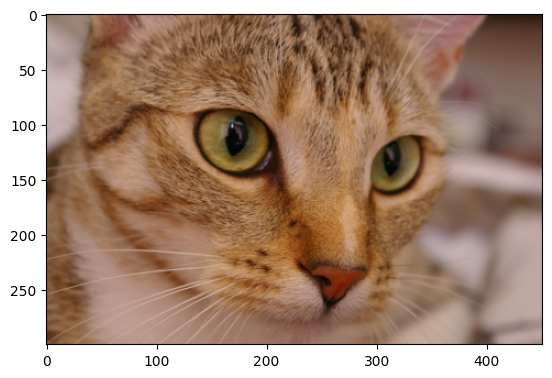

In [2]:
#@title Select Image {run: 'auto'}
image_name = 'cat' #@param ['astronaut', 'camera', 'cat', 'coffee', 'checkerboard', 'page']

image = getattr(data, image_name)()

if image.ndim < 3:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)
plt.show()

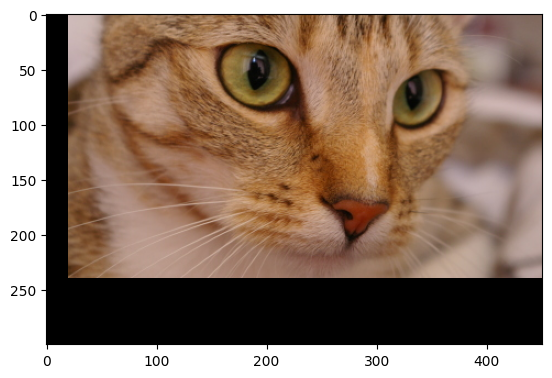

In [3]:
#@title Translation {run: 'auto'}
X = 20 #@param {type:"slider", min:-200, max:200, step:10}
Y = -60 #@param {type:"slider", min:-200, max:200, step:10}

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, translation_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

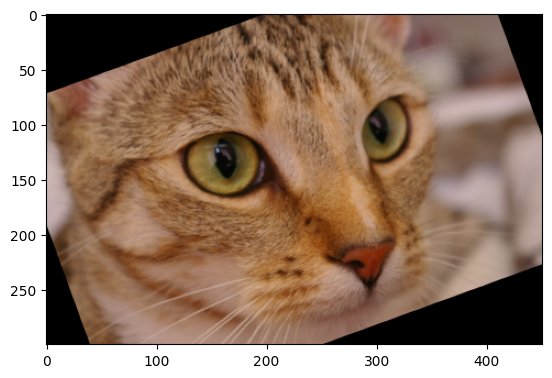

In [4]:
#@title Rotation {run: 'auto'}
angle = 20 #@param {type:"slider", min:0, max:360, step:5}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

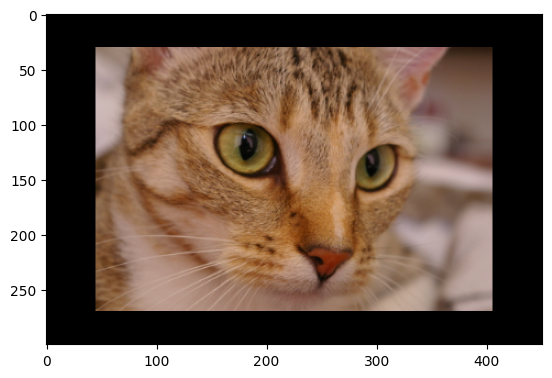

In [5]:
#@title Scale {run: 'auto'}
scale = 0.8 #@param {type:"slider", min:0.5, max:2, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=0, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

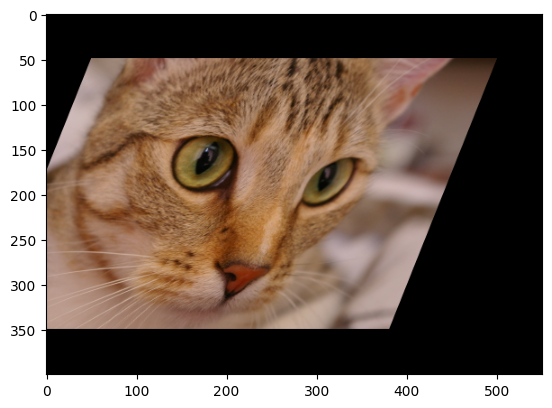

In [6]:
#@title Shearing {run: 'auto'}
sh_x = -0.4 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

shearing_matrix = np.array([
    [1, sh_x, 50],
    [sh_y, 1, 50],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, shearing_matrix[:2], (image.shape[1]+100, image.shape[0]+100))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

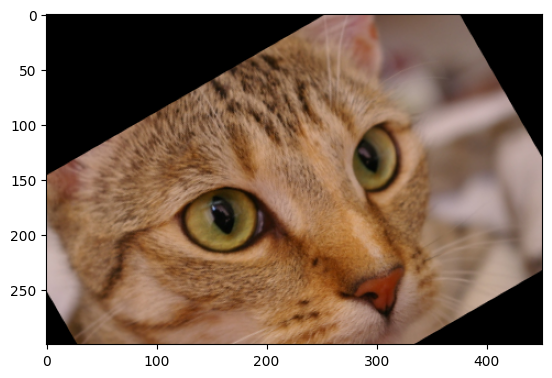

In [7]:
#@title Affine Transformation {run: 'auto'}
angle = 30 #@param {type:"slider", min:0, max:360, step:5}
scale = 1 #@param {type:"slider", min:0.5, max:2, step:0.1}
X = 0 #@param {type:"slider", min:-200, max:200, step:10}
Y = 40 #@param {type:"slider", min:-200, max:200, step:10}
sh_x = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

shearing_matrix = np.array([
    [1, sh_x, 0],
    [sh_y, 1, 0],
    [0, 0, 1]
], dtype=np.float32)

aff_mat = translation_matrix @ rotate_matrix @ shearing_matrix

dst = cv2.warpAffine(image, aff_mat[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

----